# EDA on reviews


In [1]:
import pandas as pd

df_0_250 = pd.read_csv('reviews_0-250_masked.csv')
df_250_500 = pd.read_csv('reviews_250-500_masked.csv')
df_500_750 = pd.read_csv('reviews_500-750_masked.csv')
df_750_1250 = pd.read_csv('reviews_750-1250_masked.csv')
df_1250_end = pd.read_csv('reviews_1250-end_masked.csv')

In [2]:
# combining the dataframes into one dataframe
combined_df = pd.concat([df_0_250, df_250_500, df_500_750, df_750_1250, df_1250_end], ignore_index=True)
print(f'Shape of combined_df: {combined_df.shape}')
df = combined_df

Shape of combined_df: (285412, 19)


In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285412 entries, 0 to 285411
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              285412 non-null  int64  
 1   Unnamed: 0                285412 non-null  int64  
 2   rating                    285412 non-null  int64  
 3   is_recommended            228180 non-null  float64
 4   helpfulness               131090 non-null  float64
 5   total_feedback_count      285412 non-null  int64  
 6   total_neg_feedback_count  285412 non-null  int64  
 7   total_pos_feedback_count  285412 non-null  int64  
 8   submission_time           285412 non-null  object 
 9   review_text               285067 non-null  object 
 10  review_title              205718 non-null  object 
 11  skin_tone                 230186 non-null  object 
 12  eye_color                 217666 non-null  object 
 13  skin_type                 248538 non-null  o

In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,285412.000000,285412.000000,285412.000000,228180.000000,131090.000000,285412.000000,285412.000000,285412.000000,285412.000000
mean,180616.184242,180616.184242,4.330526,0.843864,0.775019,3.199368,0.685928,2.513440,39.822644
std,168373.481176,168373.481176,1.122987,0.362985,0.320146,20.588738,4.621723,18.311465,26.558647
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,41419.000000,41419.000000,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,24.000000
50%,115587.500000,115587.500000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.000000
75%,325059.250000,325059.250000,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,49.000000
max,599837.000000,599837.000000,5.000000,1.000000,1.000000,5464.000000,1159.000000,5050.000000,1900.000000


In [5]:
# Explore unique values and frequencies for non-numerical columns.
print("\nUnique Values and Frequencies (Non-Numerical Columns):")
for col in df.select_dtypes(exclude=['number']):
  if col not in ['submission_time', 'review_text', 'review_title', 'product_id', 'product_name', 'brand_name']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique Values and Frequencies (Non-Numerical Columns):

Column: skin_tone
light          66047
fair           52619
lightMedium    47941
medium         17770
mediumTan      15341
fairLight      13958
tan             8562
deep            5181
rich            1435
porcelain        606
olive            528
dark             176
notSureST         19
ebony              3
Name: skin_tone, dtype: int64

Column: eye_color
brown    115167
blue      43114
green     29115
hazel     28836
Grey       1270
gray        164
Name: eye_color, dtype: int64

Column: skin_type
combination    138772
dry             45595
oily            32309
normal          31862
Name: skin_type, dtype: int64

Column: hair_color
brown       99755
blonde      49809
black       45907
auburn       7385
red          6512
brunette     3751
gray         1212
Name: hair_color, dtype: int64


In [6]:
df.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
rating                           0
is_recommended               57232
helpfulness                 154322
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    345
review_title                 79694
skin_tone                    55226
eye_color                    67746
skin_type                    36874
hair_color                   71081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

## Data Cleaning

In [7]:
# Impute missing values
for col in ['is_recommended', 'helpfulness', 'price_usd']:
    df[col] = df[col].fillna(df[col].median())

for col in ['skin_tone', 'eye_color', 'skin_type', 'hair_color']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Remove rows where both review_text and review_title are missing
df.dropna(subset=['review_text', 'review_title'], how='all', inplace=True)

# Remove duplicate reviews based on review_text
df.drop_duplicates(subset=['review_text'], keep='first', inplace=True)

# Display first two rows of the cleaned dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,0,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,light,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,1,1,0.0,1.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,2,5,1.0,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,3,5,1.0,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,light,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,4,5,1.0,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


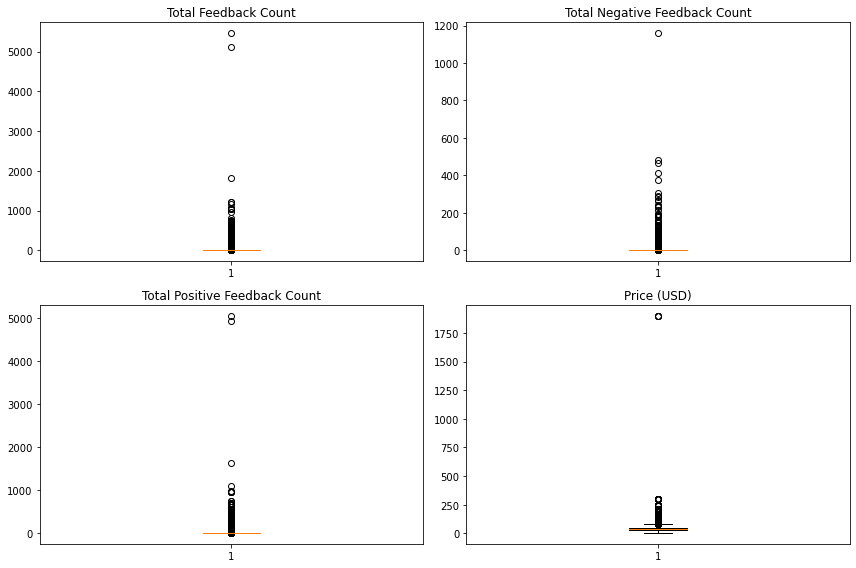

In [9]:
import matplotlib.pyplot as plt

# Create box plots to visualize outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(df['total_feedback_count'])
plt.title('Total Feedback Count')

plt.subplot(2, 2, 2)
plt.boxplot(df['total_neg_feedback_count'])
plt.title('Total Negative Feedback Count')

plt.subplot(2, 2, 3)
plt.boxplot(df['total_pos_feedback_count'])
plt.title('Total Positive Feedback Count')

plt.subplot(2, 2, 4)
plt.boxplot(df['price_usd'])
plt.title('Price (USD)')

plt.tight_layout()
plt.show()

# Cap extreme values (example: using the 95th percentile as the upper bound)
for col in ['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']:
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=upper_bound)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


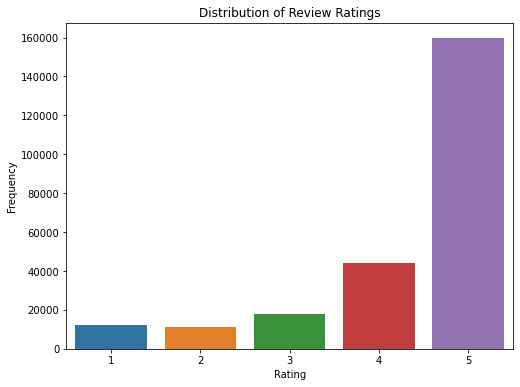

count    244922.000000
mean          4.338573
std           1.113916
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Most Frequent Words:
[('skin', 291041), ('product', 135025), ('face', 93730), ('love', 91846), ('use', 88736), ('like', 79307), ('mask', 72827), ('cleanser', 68969), ('really', 66319), ('dry', 65296), ('using', 64270), ('feel', 49641), ('great', 48095), ('one', 41821), ('used', 41249), ('makeup', 40496), ('would', 40160), ('feels', 37355), ('good', 35707), ('soft', 33984)]

Most Frequent Bigrams:
[('2022meghansouth', 'jerseysubmitted'), ('21cdn', '396g'), ('274', '5000i'), ('390', '410'), ('6month', 'recenlty'), ('abso', 'lovvvvv'), ('absolu', 'lacquer'), ('acabe', 'compraré'), ('acetonitrile', 'benzalkonium'), ('acne2', 'agolove')]


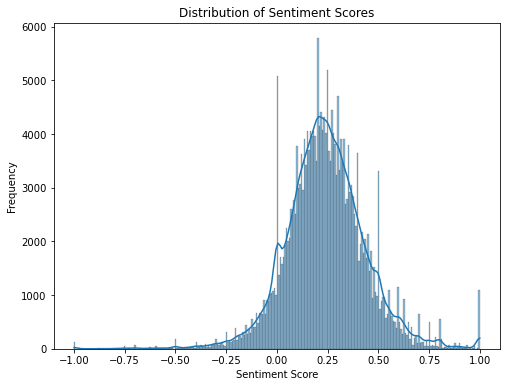

Average sentiment score: 0.2403721784480826


In [10]:
import nltk
nltk.download('punkt_tab')


import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from textblob import TextBlob

# Rating Distribution Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print(df['rating'].describe())

# Text Data Analysis
# Combine all review texts into a single string
all_reviews = ' '.join(df['review_text'].astype(str))

# Tokenize the text
tokens = word_tokenize(all_reviews.lower())

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if not w in stop_words and w.isalnum()]

# Word Frequency Distribution
fdist = FreqDist(filtered_tokens)
print("\nMost Frequent Words:")
print(fdist.most_common(20))

# Bigram Analysis 
bigram_finder = BigramCollocationFinder.from_words(filtered_tokens)
bigram_measures = BigramAssocMeasures()
print("\nMost Frequent Bigrams:")
print(bigram_finder.nbest(bigram_measures.pmi, 10))

# Sentiment Analysis
sentiment_scores = []
for text in df['review_text'].astype(str):
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)
    
df['sentiment_score'] = sentiment_scores

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

print(f"Average sentiment score: {df['sentiment_score'].mean()}")

## Visualizations

In [11]:
from wordcloud import WordCloud

Text(0, 0.5, 'Frequency')

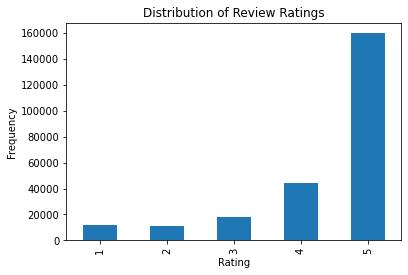

In [12]:
# Rating distribution
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Top 10 Bigrams')

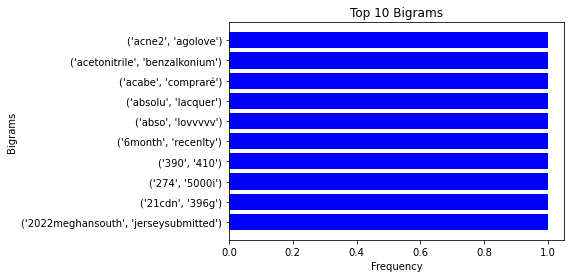

In [13]:
# Bigrams Distribution
top_10_bigrams = bigram_finder.nbest(bigram_measures.pmi, 10)
bigram_frequencies = [bigram_finder.ngram_fd[bigram] for bigram in top_10_bigrams]
bigram_labels = [str(bigram) for bigram in top_10_bigrams] # Convert bigrams to strings
plt.barh(bigram_labels, bigram_frequencies, color='blue') # Use string labels
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams')

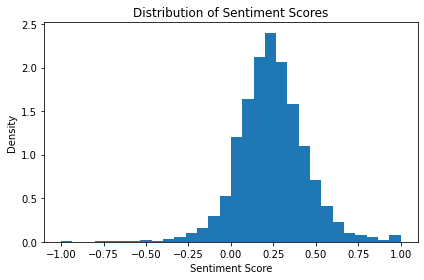

In [14]:
# Sentiment score distribution
df['sentiment_score'].plot(kind='hist', bins=30, density=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Word Frequency Distribution')

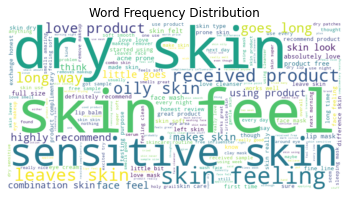

In [15]:
# Wordcloud for word frequency distribution
text = ' '.join(filtered_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Frequency Distribution')